### Om deze code te runnen moet je altijd vanaf boven beginnen met uitvoeren. Dus je klikt dan vanuit het blokje hieronder steeds op uitvoeren.

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

In [9]:
#De TIC id voor exoplanet HIP 65 A b

TIC = 'TIC 201248411'

In [10]:
#In dit gedeelte wordt de geselecteerde data van de exoplaneet HIP 65 A b opgevraagd en getoont
available_data = lk.search_lightcurve(TIC, author = 'SPOC')[2:6]

available_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 28,2020,SPOC,20,201248411,0.0
1,TESS Sector 28,2020,SPOC,120,201248411,0.0
2,TESS Sector 29,2020,SPOC,20,201248411,0.0
3,TESS Sector 29,2020,SPOC,120,201248411,0.0


<IPython.core.display.Javascript object>


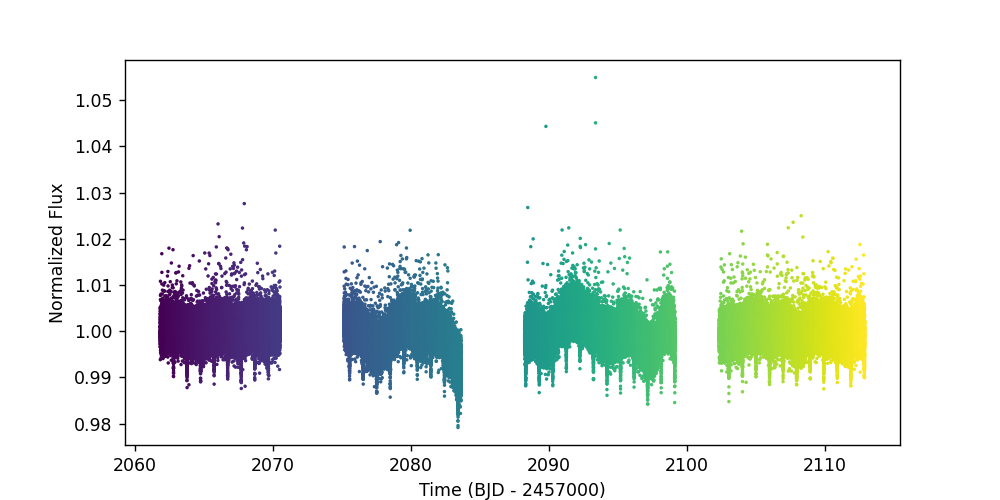

In [11]:
#Hierin wordt de data van hierboven in een grafiek geplot. 
'''
In de grafiek zie je een lightcurve, deze laat zien hoe het light van de ster HIP 65 A soms kort geblokeert wordt door exoplaneet HIP 65 A b. 
Dit kan je zien in afwijkende stippelpatronen naar beneden die steeds terug komen.
'''
#De kleur van de grafiek geeft aan hoe oud de gegevens zijn, de donkerste kleuren zijn de oudste gegevens.

lc_collection = available_data.download_all().stitch()

fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = lc_collection.time.value, s = 1)

plt.xlabel("Time (BJD - 2457000)")
plt.ylabel("Normalized Flux")
plt.show()

In [12]:
#In dit stukje code probeer ik aan de hand van deze grafiek de omlooptijd van de exoplaneet te berekenen.
#Aangezien ik dit handmatig probeer te berekenen met gegevens van de grafiek klopt dit niet altijd.

transit_time_1 = 2064.772
transit_time_2 = 2065.758

starting_period = transit_time_2 - transit_time_1

print ("Period : {} days".format(starting_period))

Period : 0.9859999999998763 days


<IPython.core.display.Javascript object>


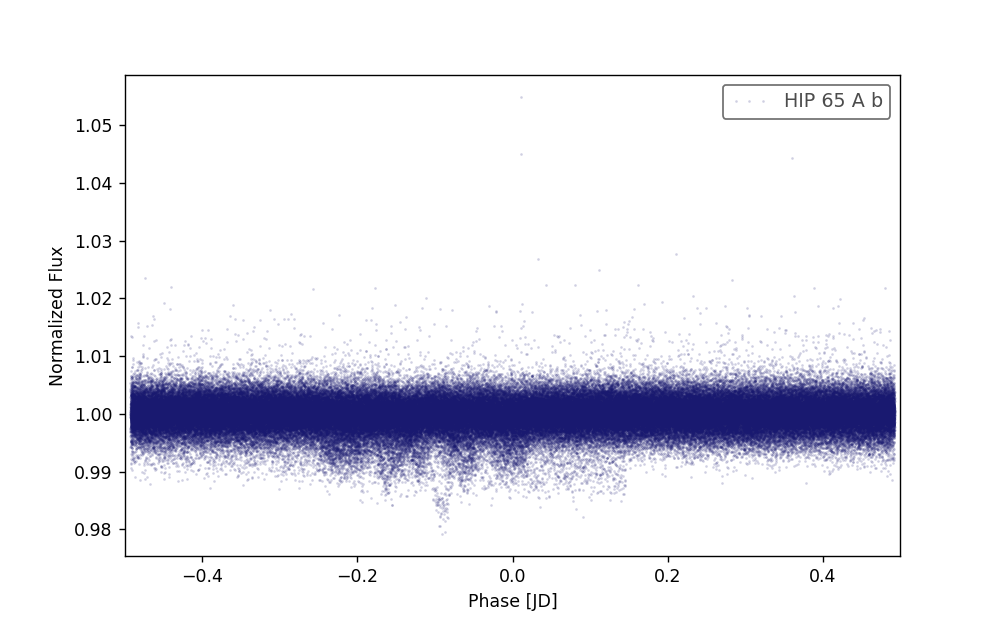

(-0.5, 0.5)

In [13]:
#In dit stukje code ga ik één "jaar" (periode) proberen te plotten in een grafiek.
#Als de omlooptijd klopt liggen bijna alle stipjes netjes op elkaar en krijg je een duidelijke dip in de lijn van stipjes.
#Als de grafiek er niet zo uit ziet dan klopt de omlooptijd niet.
#Soms is er maar een klein verschil tussen de berekende omlooptijd en de echte omlooptijd.

period =  0.9859999999998763 

lc_phased = lc_collection.fold(period = period, epoch_time = transit_time_1)

fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'midnightblue', alpha = 0.2, markersize = 1, label = 'HIP 65 A b')

plt.xlim(-0.5,0.5)

#Als de berekende periode niet klopt is er nog een andere manier waardoor je achter de omlooptijd van de exoplaneet kan komen.
#Bij deze manier kijk je stapje voor stapje wat de omlooptijd kan zijn


### Als je de volgende regels aan code uitvoert werken de eerdere grafieken niet meer. Om bij de eerdere grafieken dus bijvoorbeeld in te zoomen moet je bij 'file' klikken op 'close and halt' en dan kan je de code weer opnieuw runnen voor de eerdere grafieken.

In [14]:
'''
Met de code in die in de volgende regels staat kan je zelf opzoek gaan naar de omlooptijd.
Dit ga je doen aan de hand van een grafiek met een slider erboven.
De slider kan je (als je erop drukt) met de pijltjestoetsen naar links en rechts bewegen.
Als de 2 lightcurven perfect op elkaar liggen dan heb je de omlooptijd.
'''

%matplotlib inline 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [15]:
#Hierin worden de twee ligtcurven geplot in een grafiek.

def plot_phase_folded_color(period):

    
    lc_phased = lc_collection.fold(period = period, epoch_time = transit_time_1)
    
    fig, ax = plt.subplots(figsize = (8,5))
    
    plt.scatter(lc_phased.time.value, lc_phased.flux.value, c = lc_phased.time_original.value, s = 1, marker = '.')
    
    
    plt.xlabel("Phase")
    plt.ylabel("Normalized flux")
    plt.show()

In [16]:
#Dit stukje zorgt ervoor dat je zelf ook interactief kan werken met de geplotte data.
'''
In dit stukje code staat value voor wat je denkt dat de waarde van de omlooptijd is.
Min staat voor de minimale waarde die de de omlooptijd kan zijn.
Max staat voor de maximale waarde die de de omlooptijd kan zijn.
En step staat voor de stap groote, deze kan je groter of kleiner maken.
Let op: de grafiek heeft vertraging
'''
interact(plot_phase_folded_color, period = widgets.FloatSlider(value=0.9800000,min =0.9780000,max=0.9830000,step=0.0001,description='period:', readout_format='.4f'))

interactive(children=(FloatSlider(value=0.98, description='period:', max=0.983, min=0.978, readout_format='.4f…

<function __main__.plot_phase_folded_color(period)>

### Zoals je uit de grafiek hier boven kan halen ligt de echte periode rond de 0.9809 dagen